In [1]:
!pip install -q -r requirements.txt

# Initial Data Assesment

### 1. Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Import Data

In [2]:
df = pd.read_csv('../data/raw/TelcoCustomerChurnPrediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Type Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 3.1 Numerical & Categorical Data

In [4]:
numerical_variables = [
                        'MonthlyCharges', 'TotalCharges', 'tenure'
                      ]

categorical_variables = [
                            'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                            'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
                        ]

print(f"Number of Numerical Variables: {len(numerical_variables)}")
print(f"Number of Categorical Variables: {len(categorical_variables)}")

Number of Numerical Variables: 3
Number of Categorical Variables: 15


In [5]:
print(f"\n ---Number of Numerical Items \n{df[numerical_variables].count()}")
print(f"\n ---Number of categorical Items \n{df[categorical_variables].count()}")


 ---Number of Numerical Items 
MonthlyCharges    7043
TotalCharges      7043
tenure            7043
dtype: int64

 ---Number of categorical Items 
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
dtype: int64


### 3.2 Nominal & Ordinal Data

In [6]:
nominal_variables = [
                        'gender', 'SeniorCitizen', 'Partner', 'PhoneService', 'Dependents',
                        'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',

                    ]

ordinal_variables = [
                        'Contract', 
                    ]
print(f"Number of Nominal Variables: {len(nominal_variables)}")
print(f"Number of Categorical Variables: {len(ordinal_variables)}")

Number of Nominal Variables: 12
Number of Categorical Variables: 1


In [7]:
print(f"\n ---Number of Nominal Items \n{df[nominal_variables].count()}")
print(f"\n ---Number of Ordinal Items \n{df[ordinal_variables].count()}")


 ---Number of Nominal Items 
gender              7043
SeniorCitizen       7043
Partner             7043
PhoneService        7043
Dependents          7043
OnlineSecurity      7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
PaperlessBilling    7043
PaymentMethod       7043
dtype: int64

 ---Number of Ordinal Items 
Contract    7043
dtype: int64


### 3.3 Continuos & Discrete Data

In [8]:
continuous_variables =  [
                            'MonthlyCharges', 'TotalCharges'
                        ]
discete_variables = [
                        'tenure'
                    ]
print(f"Number of Continuous Variables: {len(continuous_variables)}")
print(f"Number of Discrete Variables: {len(discete_variables)}")

Number of Continuous Variables: 2
Number of Discrete Variables: 1


In [9]:
print(f"\n ---Number of Continuous Items \n{df[continuous_variables].count()}")
print(f"\n ---Number of Discrete Items \n{df[discete_variables].count()}")


 ---Number of Continuous Items 
MonthlyCharges    7043
TotalCharges      7043
dtype: int64

 ---Number of Discrete Items 
tenure    7043
dtype: int64


## 4. Missing Values Analysis

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing values to handle

## 5. Inconsistency Analysis


In [11]:
df['customerID'].is_unique

True

## 6. Target Variable Analysis

In [12]:
churn_customers = df['Churn'].value_counts()['Yes']
non_churn_customers = df['Churn'].value_counts()['No']
churn_rate = churn_customers / df['Churn'].count() * 100
print(f"Number of Churn customers: {churn_customers}")
print(f"Number of Churn customers: {non_churn_customers}")
print(f"Customer Churn Percentage: : {churn_rate} %")

Number of Churn customers: 1869
Number of Churn customers: 5174
Customer Churn Percentage: : 26.536987079369588 %


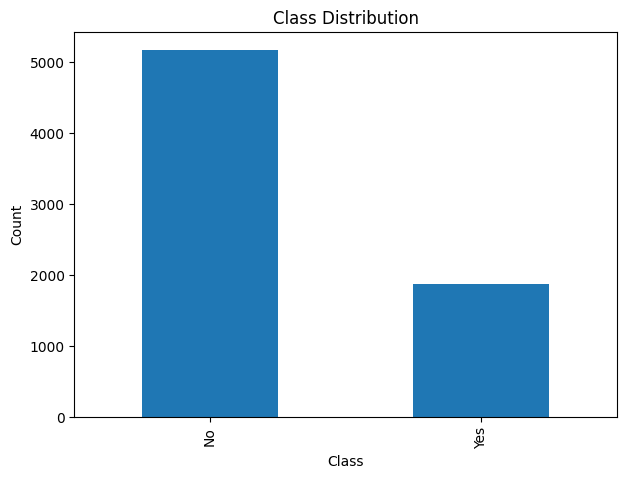

In [13]:
plt.figure(figsize=(7, 5))
df["Churn"].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


There is Big class Imbalance in churn rate there is 3 times No rather than Yes's

## 7. Feature Overview
Categorize features into demographic, behavioral, and financial groups

--- 

## **1. Demographic Features**

**Definition:**
Attributes that describe **who** the entity (often a person, customer, or organization) is, based on relatively stable, descriptive characteristics. These are usually **static or slow-changing** over time.

**Examples:**

* Age, gender, marital status
* Education level, occupation
* Geographic location (city, country, ZIP code)
* Nationality, ethnicity (when ethically and legally collected)

**Purpose in modeling:**

* Used to segment populations, understand target audiences, and predict preferences or needs.
* Often combined with behavioral and financial features for richer models.

---

## **2. Behavioral Features**

**Definition:**
Attributes that describe **what** the entity does — patterns of **actions, choices, and interactions** over time. These are usually **dynamic and time-sensitive**.

**Examples:**

* Website/app usage frequency
* Product purchase history
* Click-through rates on ads
* Browsing patterns, search queries
* Loyalty program engagement

**Purpose in modeling:**

* Capture **habits and tendencies** that are directly linked to outcomes like churn, conversions, or recommendations.
* Particularly powerful for personalization and predictive analytics.

---

## **3. Financial Features**

**Definition:**
Attributes that describe the **economic status or monetary interactions** of the entity. These can be current values or historical patterns.

**Examples:**

* Income, salary range
* Credit score, outstanding loans
* Account balances, transaction history
* Spending patterns, savings rate
* Payment defaults or delays

**Purpose in modeling:**

* Predict creditworthiness, spending ability, and financial risk.
* Often critical in banking, insurance, and e-commerce analytics.

---

💡 **Key differences in modeling context:**

| Category        | Stability                | Data Source                   | Typical Use                            |
| --------------- | ------------------------ | ----------------------------- | -------------------------------------- |
| **Demographic** | Stable over months/years | Surveys, registration forms   | Segmentation, baseline profiling       |
| **Behavioral**  | Changes frequently       | Activity logs, event tracking | Engagement prediction, personalization |
| **Financial**   | Medium to dynamic        | Banking data, payment systems | Risk assessment, revenue prediction    |

---

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
demographic_features = [
                            "gender", "SeniorCitizen", "Partner", "Dependents"
                       ]

behavioral_features = [
                            "tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity"
                            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling"
                      ]
financial_features = [
                            "PaymentMethod", "MonthlyCharges", "TotalCharges"
                     ]